# 0 - Dataset

<a href = "https://www.kaggle.com/fedesoriano/stroke-prediction-dataset"> Stroke Prediction Dataset </a>

# 1 - Acquiring the data

In [ ]:
# Importing the libraries used to acquire the data
from google.colab import drive
import pandas as pd

# Mounting Google Drive
drive.mount('/content/drive/', force_remount = True)

# Downloading the data file (Daniel's path to the csv file)
dt = pd.read_csv('/content/drive/My Drive/My data files/healthcare-dataset-stroke-data.csv', header = 0)

Mounted at /content/drive/


In [ ]:
# Checking data first 5 rows
dt.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<b>Attribute metadata:</b>
<ol>
    <li> <i>id</i>: unique identifier </li>
    <li> <i>gender</i>: "Male", "Female" or "Other" </li>
    <li> <i>age</i>: age of the patient </li>
    <li> <i>hypertension</i>: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension </li>
    <li> <i>heart_disease</i>: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease </li>
    <li> <i>ever_married</i>: "No" or "Yes" </li>
    <li> <i>work_type</i>: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" </li>
    <li> <i>Residence_type</i>: "Rural" or "Urban" </li>
    <li> <i>avg_glucose_level</i>: average glucose level in blood </li>
    <li> <i>bmi</i>: body mass index </li>
    <li> <i>smoking_status</i>: "formerly smoked", "never smoked", "smokes" or "Unknown"* </li>
    <li> <i>stroke</i>: 1 if the patient had a stroke or 0 if not </li>
</ol>

<b>Note</b>: "Unknown" in <i>smoking_status</i> means that the information is unavailable for this patient

# 2 - Pre-processing data

In [ ]:
# Dropping id column since it has no use for prediction
dt.drop(axis='columns', columns = ['id'], inplace=True)

In [ ]:
# Rounding age feature and changing its type to integer
dt['age'] = dt['age'].apply(lambda x : round(x))
dt['age'] = dt['age'].astype('int')

In [ ]:
# Checking dataframe after the conversion of age feature and drop of if column
dt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Checking if there is any missing value
dt.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Checking the representativeness of the missing values in the dataset
original_len_dt = len(dt)
missing_values = dt.isnull().sum().sum()

print(f'Number of data entries in the database: {original_len_dt}')
print(f'Number of missing values for bmi attribute: {missing_values}')
print(f'Percentage of missing values for bmi attribute: {round(missing_values/original_len_dt*100, 2)}%')

Number of data entries in the database: 5110
Number of missing values for bmi attribute: 201
Percentage of missing values for bmi attribute: 3.93%


There are 201 missing values in the body mass index attribute (<i>bmi</i>), but it only represents 3.9% of the data.

Therefore, these data entries will be ignored from the analysis (removed from the dataset).

In [ ]:
# Dropping missing values from bmi feature
dt.dropna(axis='rows', subset=['bmi'], inplace=True)

# Checking if there is any remaining missing value
print(f'The total os missing values in the dataset is now equal to: '
    f'{dt.isnull().sum().sum()}')

The total os missing values in the dataset is now equal to: 0


In [ ]:
# Checking if the removal process removed only missing values
new_len_dt_mv = len(dt)

print(f'Number of data entries in the database before the removal of missing values: {original_len_dt} \n'
      f'Number of data entries in the database after the removal of missing values: {new_len_dt_mv} \n'
      f'Number of missing values before the removal: {missing_values} \n'
      f'{original_len_dt} - {missing_values} = {new_len_dt_mv} ({original_len_dt - missing_values == new_len_dt_mv})'
      )

Number of data entries in the database before the removal of missing values: 5110 
Number of data entries in the database after the removal of missing values: 4909 
Number of missing values before the removal: 201 
5110 - 201 = 4909 (True)


<h2>Visual analysis of the data</h2>

In [ ]:
# Importing the libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

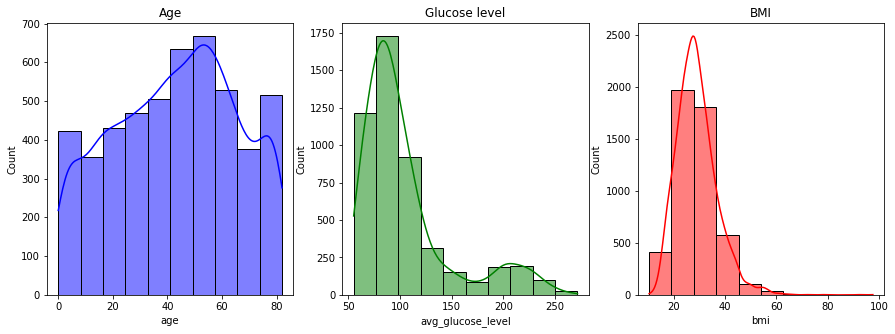

In [ ]:
# Visualizing the numeric data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=dt, x="age", kde=True, bins=10, color="blue", ax=axs[0]).set_title('Age')
sns.histplot(data=dt, x="avg_glucose_level", kde=True, bins=10, color="green", ax=axs[1]).set_title('Glucose level')
sns.histplot(data=dt, x="bmi", kde=True, bins=10, color="red", ax=axs[2]).set_title('BMI')

plt.show()

In [ ]:
# Checking the levels in the categoric variables
print(f'Gender: \n{dt.gender.value_counts()} \n')
print(f'Stroke: \n{dt.stroke.value_counts()} \n')
print(f'Smoking status: \n{dt.smoking_status.value_counts()} \n')

Gender: 
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64 

Stroke: 
0    4700
1     209
Name: stroke, dtype: int64 

Smoking status: 
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64 



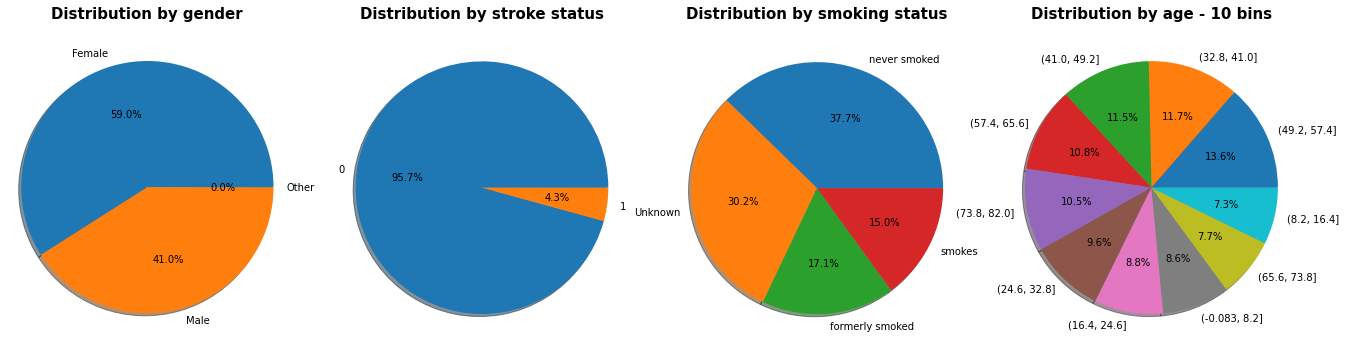

In [ ]:
# Checking the distribuition of some features
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (23, 6))

# Plot settings
label_distance = 1.1
pct = '%1.1f%%'
fontsize = 15

# Gender
ax1.pie(dt.gender.value_counts(), labels=dt.gender.value_counts().index.tolist(), 
        labeldistance=label_distance, autopct=pct, shadow=True)
ax1.axis('equal')
ax1.set_title('Distribution by gender', fontweight="bold", size=fontsize)

# Stroke
ax2.pie(dt.stroke.value_counts(), labels=dt.stroke.value_counts().index.tolist(), 
        labeldistance=label_distance, autopct=pct, shadow=True)
ax2.axis('equal')
ax2.set_title('Distribution by stroke status', fontweight="bold", size=fontsize)

# Smoking status
ax3.pie(dt.smoking_status.value_counts(), labels=dt.smoking_status.value_counts().index.tolist(), 
        labeldistance=label_distance, autopct=pct, shadow=True)
ax3.axis('equal')
ax3.set_title('Distribution by smoking status', fontweight="bold", size=fontsize)

# Age
ax4.pie(dt.age.value_counts(bins=10), labels=dt.age.value_counts(bins=10).index.tolist(), 
        labeldistance=label_distance, autopct=pct, shadow=True)
ax4.axis('equal')
ax4.set_title('Distribution by age - 10 bins', fontweight="bold", size=fontsize)

plt.show()

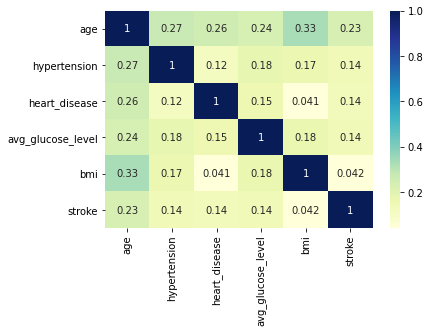

In [ ]:
# Heatmap to check correlation between variables
sns.heatmap(dt.corr(), annot=True, cmap="YlGnBu")

There is no significant correlation in the dataset variables.

Text(0.5, 0.98, 'Age x Stroke frequency')

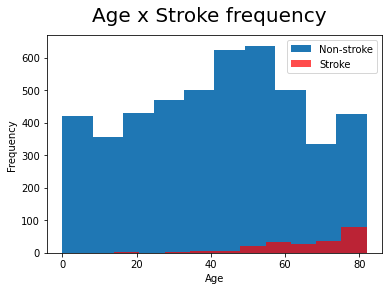

In [ ]:
# Checking for relation between age and stroke
# Age histogram
plt.hist(dt[dt["stroke"] == 0].loc[:, "age"], label='Non-stroke')

# Stroke histogram
plt.hist(dt[dt["stroke"] == 1].loc[:, "age"], alpha=0.7, color='red', label='Stroke')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.suptitle('Age x Stroke frequency', fontsize=20)

Clearly, there is a relation between age and stroke frequency. As the graph shows, the older the person, the higher the chance of having a stroke is.

Text(0.5, 0.98, 'Gender x Stroke frequency')

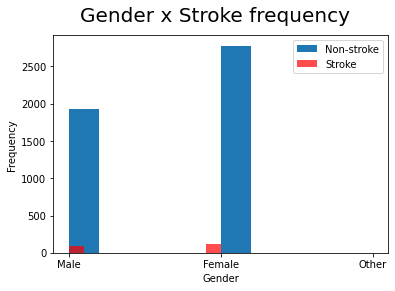

In [ ]:
# Checking for correlation between gender and stroke
# Age histogram
plt.hist(dt[dt["stroke"] == 0].loc[:, "gender"], label='Non-stroke')

# Stroke histogram
plt.hist(dt[dt["stroke"] == 1].loc[:, "gender"], alpha=0.7, color='red', label='Stroke')

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend()
plt.suptitle('Gender x Stroke frequency', fontsize=20)

In [ ]:
cnt_man = len(dt[dt["gender"] == "Male"])
cnt_man_stroke = len(dt[(dt["gender"] == "Male") & (dt["stroke"] == 1)])
cnt_woman = len(dt[dt["gender"] == "Female"])
cnt_woman_stroke = len(dt[(dt["gender"] == "Female") & (dt["stroke"] == 1)])

print(f'Number of men in the dataset: {cnt_man}')
print(f'Number of men in the dataset that had a stroke: {cnt_man_stroke}')
print(f'Percentage of men in the dataset that had a stroke: {round(cnt_man_stroke/cnt_man * 100, 2)}%\n')

print(f'Number of women in the dataset: {cnt_woman}')
print(f'Number of women in the dataset that had a stroke: {cnt_woman_stroke}')
print(f'Percentage of women in the dataset that had a stroke: {round(cnt_woman_stroke/cnt_woman * 100, 2)}%\n')

Number of men in the dataset: 2011
Number of men in the dataset that had a stroke: 89
Percentage of men in the dataset that had a stroke: 4.43%

Number of women in the dataset: 2897
Number of women in the dataset that had a stroke: 120
Percentage of women in the dataset that had a stroke: 4.14%



There is no relation between gender and stroke frequency.

Text(0.5, 0.98, 'Smoking status x Stroke frequency')

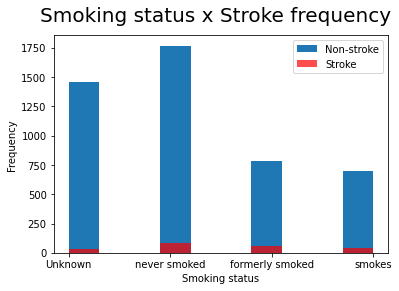

In [ ]:
# Checking for correlation between smoking status and stroke
# Age histogram
plt.hist(dt[dt["stroke"] == 0].loc[:, "smoking_status"], label='Non-stroke')

# Stroke histogram
plt.hist(dt[dt["stroke"] == 1].loc[:, "smoking_status"], alpha=0.7, color='red', label='Stroke')

plt.xlabel('Smoking status')
plt.ylabel('Frequency')
plt.legend()
plt.suptitle('Smoking status x Stroke frequency', fontsize=20)

In [ ]:
cnt_unkown = len(dt[dt["smoking_status"] == "Unknown"])
cnt_unkown_stroke = len(dt[(dt["smoking_status"] == "Unknown") & (dt["stroke"] == 1)])

cnt_never_smoked = len(dt[dt["smoking_status"] == "never smoked"])
cnt_never_smoked_stroke = len(dt[(dt["smoking_status"] == "never smoked") & (dt["stroke"] == 1)])

cnt_formerly_smoked = len(dt[dt["smoking_status"] == "formerly smoked"])
cnt_formerly_smoked_stroke = len(dt[(dt["smoking_status"] == "formerly smoked") & (dt["stroke"] == 1)])

cnt_smokes = len(dt[dt["smoking_status"] == "smokes"])
cnt_smokes_stroke = len(dt[(dt["smoking_status"] == "smokes") & (dt["stroke"] == 1)])

print(f'Number of "Unknown" status: {cnt_unkown}')
print(f'Number of "Unknown" that had a stroke: {cnt_unkown_stroke}')
print(f'Percentage of "Unknown" that had a stroke: {round(cnt_unkown_stroke/cnt_unkown * 100, 2)}%\n')

print(f'Number of "never smoked" status: {cnt_never_smoked}')
print(f'Number of "never smoked" that had a stroke: {cnt_never_smoked_stroke}')
print(f'Percentage of "never smoked" that had a stroke: {round(cnt_never_smoked_stroke/cnt_never_smoked * 100, 2)}%\n')

print(f'Number of "formerly smoked" status": {cnt_formerly_smoked}')
print(f'Number of "formerly smoked" that had a stroke: {cnt_formerly_smoked_stroke}')
print(f'Percentage of "formerly smoked" that had a stroke: {round(cnt_formerly_smoked_stroke/cnt_formerly_smoked * 100, 2)}%\n')

print(f'Number of "smokes" status": {cnt_smokes}')
print(f'Number of "smokes" that had a stroke: {cnt_smokes_stroke}')
print(f'Percentage of "smokes" that had a stroke: {round(cnt_smokes_stroke/cnt_smokes * 100, 2)}%\n')

Number of "Unknown" status: 1483
Number of "Unknown" that had a stroke: 29
Percentage of "Unknown" that had a stroke: 1.96%

Number of "never smoked" status: 1852
Number of "never smoked" that had a stroke: 84
Percentage of "never smoked" that had a stroke: 4.54%

Number of "formerly smoked" status": 837
Number of "formerly smoked" that had a stroke: 57
Percentage of "formerly smoked" that had a stroke: 6.81%

Number of "smokes" status": 737
Number of "smokes" that had a stroke: 39
Percentage of "smokes" that had a stroke: 5.29%



It seems that people who smoke or formerly smoked have a slightly higher chance to get a stroke. However, considering the large number of people whose smoking status is unknown is not possible to define if there is or there isn't a relationship between the smoking status and stroke frequency.

In [ ]:
# Checking the representativeness of the unkown values in the smoking_status attribute
count_unknown_smoking_status = dt["smoking_status"].value_counts().Unknown

print(f'The "unkown" status corresponds to {round(count_unknown_smoking_status/new_len_dt_mv * 100, 2)}%'
    f' of the "smoking_status" attribute.')

The "unkown" status corresponds to 30.21% of the "smoking_status" attribute.


The number of "unknown" values in <i>smoking_status</i> attribute is to expressive to be ignore. Unfortunately, at this stage, there is no way to estimate these values. 
<br>
So, we will proceed the analysis without this attribute.

In [ ]:
# Removing smoking_status from the dataset
dt.drop(axis='columns', columns = ['smoking_status'], inplace=True)

# Checking if the columns were correctly removed
dt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,1


Text(0.5, 0.98, 'Hypertension x Stroke frequency')

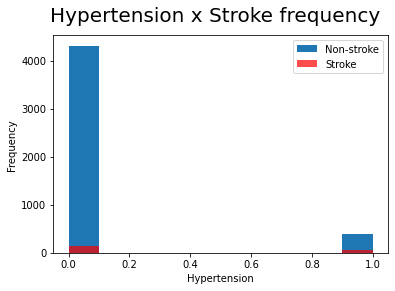

In [ ]:
# Checking for correlation between hypertension and stroke
# Age histogram
plt.hist(dt[dt["stroke"] == 0].loc[:, "hypertension"], label='Non-stroke')

# Stroke histogram
plt.hist(dt[dt["stroke"] == 1].loc[:, "hypertension"], alpha=0.7, color='red', label='Stroke')

plt.xlabel('Hypertension')
plt.legend()
plt.ylabel('Frequency')
plt.suptitle('Hypertension x Stroke frequency', fontsize=20)

In [ ]:
cnt_hypertension = len(dt[dt["hypertension"] == 1])
cnt_hypertension_stroke = len(dt[(dt["hypertension"] == 1) & (dt["stroke"] == 1)])

cnt_no_hypertension = len(dt[dt["hypertension"] == 0])
cnt_no_hypertension_stroke = len(dt[(dt["hypertension"] == 0) & (dt["stroke"] == 1)])

print(f'Number of hypertension people in the dataset: {cnt_hypertension}')
print(f'Number of hypertension people in the dataset that had a stroke: {cnt_hypertension_stroke}')
print(f'Percentage of hypertension people in the dataset that had a stroke: {round(cnt_hypertension_stroke/cnt_hypertension * 100, 2)}%\n')

print(f'Number of non-hypertension people in the dataset: {cnt_no_hypertension}')
print(f'Number of non-hypertension people in the dataset that had a stroke: {cnt_no_hypertension_stroke}')
print(f'Percentage of non-hypertension people in the dataset that had a stroke: {round(cnt_no_hypertension_stroke/cnt_no_hypertension * 100, 2)}%\n')

Number of hypertension people in the dataset: 451
Number of hypertension people in the dataset that had a stroke: 60
Percentage of hypertension people in the dataset that had a stroke: 13.3%

Number of non-hypertension people in the dataset: 4458
Number of non-hypertension people in the dataset that had a stroke: 149
Percentage of non-hypertension people in the dataset that had a stroke: 3.34%



It is visible that in that dataset, proportionally, the chances of having a stroke are much higher in the group that presented hypertension than the people in the group that didn't present this condition.

In [ ]:
# Checking the types of data in the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   int64  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   stroke             4909 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 421.9+ KB


<i>gender</i>, <i>hypertension</i>, <i>heart_disease</i>, <i>ever_married</i>, <i>work_type</i>, <i>Residence_type</i> and <i>stroke</i> are categorical features.
<br><br>
This fact implicates in two things:
<ol>
    <li> Creation of dummy variables to represent the categories with multiple levels.</li>
    <li> Conversion to 'category' type.</li>
</ol>

<p>First, we need to study the content of the categorical features.</p>

In [ ]:
# Possible values for categoric and non-boolean parameters
print(f'Gender: \n{dt["gender"].value_counts()} \n\n'
        f'Hypertension: \n{dt["hypertension"].value_counts()} \n\n'
        f'Heart disease: \n{dt["heart_disease"].value_counts()} \n\n'
        f'Ever married: \n{dt["ever_married"].value_counts()} \n\n'
        f'Work type: \n{dt["work_type"].value_counts()} \n\n'
        f'Residence type: \n{dt["Residence_type"].value_counts()} \n\n'
        f'Stroke: \n{dt["stroke"].value_counts()} \n\n'
    )

Gender: 
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64 

Hypertension: 
0    4458
1     451
Name: hypertension, dtype: int64 

Heart disease: 
0    4666
1     243
Name: heart_disease, dtype: int64 

Ever married: 
Yes    3204
No     1705
Name: ever_married, dtype: int64 

Work type: 
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64 

Residence type: 
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64 

Stroke: 
0    4700
1     209
Name: stroke, dtype: int64 




<h2>Summary of categoric variables and its values</h2>
<ul>
    <li><b>Gender:</b> Male/Female/Other</li>
    <li><b>Hypertension:</b> 0/1 </li>
    <li><b>Heart disease:</b> 0/1 </li>
    <li><b>Ever married:</b> Yes/No </li>
    <li><b>Work type:</b> Private/Self-employed/children/Govt_job/Never_worked </li>
    <li><b>Residence type:</b> Urban/Rural </li>
    <li><b>Stroke:</b> 0/1 </li>
</ul>

<h2>Data preparation steps</h2>
<ul>
    <li>For the following features, the values only need to be converted to 'category' Dtype:</li>
        <ul>
            <li>Hypertension.</li>
            <li>Heart disease.</li>
            <li>Stroke.</li>
        </ul>
    <li> Gender: </li>
        <ul>
            <li>Since 'Other' only appears once, this row will be dropped.</li>
            <li>The variable name will be changed to 'Male'. 'Male' values will be changed to 1 and 'Female' values will be represented by 0.</li>
            <li>Values will be converted to category Dtype.</li>
        </ul>
    <li> Ever married </li>
        <ul>
            <li>'Yes' will be changed to 1 and 'No' to 0.</li>
            <li>Values will be converted to category Dtype.</li>
        </ul>
    <li> Work type: </li>
        <ul>
            <li> Dummy variables will be created for each level (Private, Self-employed, children, Govt_job, Never_worked). </li>
            <li>Values will be converted to category Dtype.</li>
        </ul>
        <li> Residence type: </li>
        <ul>
            <li>The variable name will be changed to 'Urban_residence'. 'Urban' values will be changed to 1 and 'Rural' values will be represented by 0.</li>
            <li>Values will be converted to category Dtype.</li>
        </ul>


<h2> Treatment of gender attribute </h2>

In [ ]:
# Drop of the row with Gender = Other

# Reset the index to find the row with the 'other' value
dt.reset_index(drop=True, inplace=True)

# Find the index of the row with the 'other' value
index_other = dt[dt['gender'] == 'Other'].index

# Drop of the row
dt.drop(axis='index', index=index_other, inplace=True)

# Checking the remaining values
dt.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [ ]:
# Renaming the attribute to male
dt.rename(columns={'gender': 'male'}, inplace=True)

# Changing the values. Male = 1, Female = 0
dt['male'].replace({'Male': 1, 'Female': 0}, inplace=True)

In [ ]:
# Checking the values
dt.male.value_counts()

0    2897
1    2011
Name: male, dtype: int64

<h2> Treatment of ever married attribute </h2>

In [ ]:
# Changing the values. Yes = 1, No = 0.
dt['ever_married'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
# Checking the values
dt.ever_married.value_counts()

1    3204
0    1704
Name: ever_married, dtype: int64

<h2> Treatment of work type attribute </h2>

In [ ]:
# Dummy variables will be created for each level (Private, Self-employed, children, Govt_job, Never_worked).
dt = pd.get_dummies(data=dt, prefix='dm_work_type', columns=['work_type'])

In [ ]:
# Checking the data after the creation of dummy variables
dt.head()

,male,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,dm_work_type_Govt_job,dm_work_type_Never_worked,dm_work_type_Private,dm_work_type_Self-employed,dm_work_type_children
0,1,67,0,1,1,Urban,228.69,36.6,1,0,0,1,0,0
1,1,80,0,1,1,Rural,105.92,32.5,1,0,0,1,0,0
2,0,49,0,0,1,Urban,171.23,34.4,1,0,0,1,0,0
3,0,79,1,0,1,Rural,174.12,24.0,1,0,0,0,1,0
4,1,81,0,0,1,Urban,186.21,29.0,1,0,0,1,0,0


<h2> Treatment of residence type attribute </h2>

In [ ]:
# Renaming the attribute to urban_residence
dt.rename(columns={'Residence_type': 'urban_residence'}, inplace=True)

# Changing the values. Male = 1, Female = 0
dt['urban_residence'].replace({'Urban': 1, 'Rural': 0}, inplace=True)

In [ ]:
# Checking the values
dt.urban_residence.value_counts()

1    2490
0    2418
Name: urban_residence, dtype: int64

In [ ]:
# Checking the data
dt.head()

,male,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke,dm_work_type_Govt_job,dm_work_type_Never_worked,dm_work_type_Private,dm_work_type_Self-employed,dm_work_type_children
0,1,67,0,1,1,1,228.69,36.6,1,0,0,1,0,0
1,1,80,0,1,1,0,105.92,32.5,1,0,0,1,0,0
2,0,49,0,0,1,1,171.23,34.4,1,0,0,1,0,0
3,0,79,1,0,1,0,174.12,24.0,1,0,0,0,1,0
4,1,81,0,0,1,1,186.21,29.0,1,0,0,1,0,0


<h2> Converting the categoric features to category type </h2>

In [ ]:
# Converting the categorical features to category type
categorical_features = ['male', 'hypertension', 'heart_disease', 'ever_married',
       'urban_residence', 'stroke', 'dm_work_type_Govt_job', 
       'dm_work_type_Never_worked', 'dm_work_type_Private', 
       'dm_work_type_Self-employed', 'dm_work_type_children']

features = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "stroke"]

for feature in categorical_features:
    dt[feature] = dt[feature].astype('category')

In [ ]:
# General info of the data after the conversion
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 4908
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   male                        4908 non-null   category
 1   age                         4908 non-null   int64   
 2   hypertension                4908 non-null   category
 3   heart_disease               4908 non-null   category
 4   ever_married                4908 non-null   category
 5   urban_residence             4908 non-null   category
 6   avg_glucose_level           4908 non-null   float64 
 7   bmi                         4908 non-null   float64 
 8   stroke                      4908 non-null   category
 9   dm_work_type_Govt_job       4908 non-null   category
 10  dm_work_type_Never_worked   4908 non-null   category
 11  dm_work_type_Private        4908 non-null   category
 12  dm_work_type_Self-employed  4908 non-null   category
 13  dm_work_type_child

In [ ]:
# General description of numeric features
dt.describe()

,age,avg_glucose_level,bmi
count,4908.000000,4908.000000,4908.00000
mean,42.868989,105.297402,28.89456
std,22.555878,44.425550,7.85432
min,0.000000,55.120000,10.30000
25%,25.000000,77.067500,23.50000
50%,44.000000,91.680000,28.10000
75%,60.000000,113.495000,33.10000
max,82.000000,271.740000,97.60000


In [ ]:
# General description of categorical features
dt.describe(include=['category'])

,male,hypertension,heart_disease,ever_married,urban_residence,stroke,dm_work_type_Govt_job,dm_work_type_Never_worked,dm_work_type_Private,dm_work_type_Self-employed,dm_work_type_children
count,4908,4908,4908,4908,4908,4908,4908,4908,4908,4908,4908
unique,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,1,1,0,0,0,1,0,0
freq,2897,4457,4665,3204,2490,4699,4278,4886,2810,4133,4237


<h2>Checking outliers in numerical features</h2>
<ul>
    <li>age</li>
    <li>avg_glucose_level</li>
    <li>bmi</li>
</ul>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


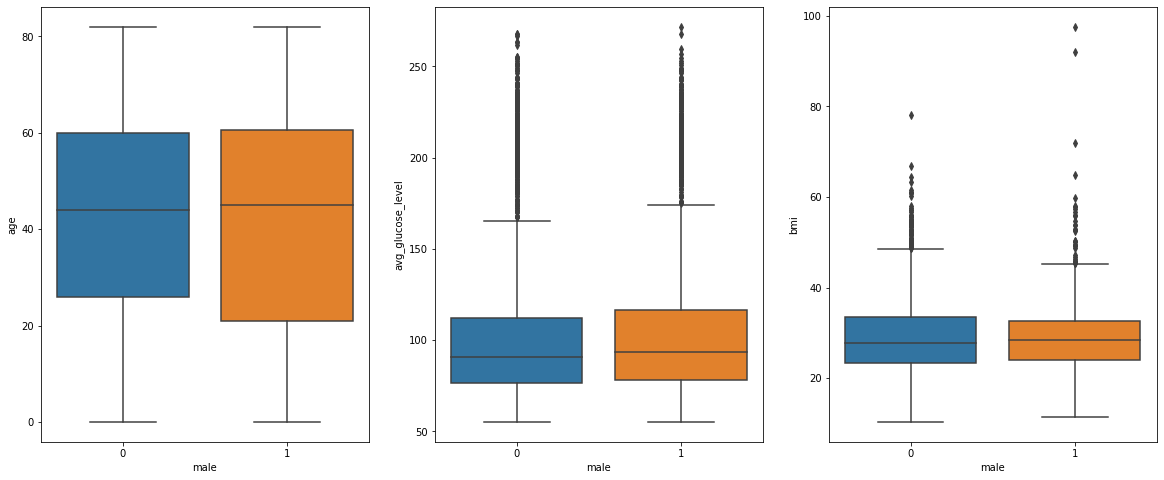

In [ ]:
# Visualy detecting outliers
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot('male', 'age', data=dt, ax=axs[0])
sns.boxplot('male', 'avg_glucose_level', data=dt, ax=axs[1])
sns.boxplot('male', 'bmi', data=dt, ax=axs[2])

In [ ]:
# Counting outliers
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:
    Q1 = dt[feature].quantile(0.25)
    Q3 = dt[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    count_outliers = len(dt[((Q1 - 1.5 * IQR) < dt[feature]) & (dt[feature] > (Q3 + 1.5 * IQR))])
    print(f'Feature: {feature}\n'
        f'Number of ouliers: {count_outliers}\n')

Feature: age
Number of ouliers: 0

Feature: avg_glucose_level
Number of ouliers: 569

Feature: bmi
Number of ouliers: 110



<p> As the boxplots show, there are no outliers in <i>age</i> feature, but there is a significant amount of outliers in <i>avg_glucose_level</i> and <i>bmi</i>

In [ ]:
# Dropping rows with outliers
numerical_features = ['avg_glucose_level', 'bmi']

for feature in numerical_features:
    dt.reset_index(drop=True, inplace=True)

    Q1 = dt[feature].quantile(0.25)
    Q3 = dt[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Ouliers indexes
    index_ouliers = dt[((Q1 - 1.5 * IQR) < dt[feature]) & (dt[feature] > (Q3 + 1.5 * IQR))].index

    dt.drop(axis='index', index=index_ouliers, inplace=True)

In [ ]:
# Checking outliers
numerical_features = ['avg_glucose_level', 'bmi']

for feature in numerical_features:
    Q1 = dt[feature].quantile(0.25)
    Q3 = dt[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    count_outliers = len(dt[((Q1 - 1.5 * IQR) < dt[feature]) & (dt[feature] > (Q3 + 1.5 * IQR))])
    print(f'Feature: {feature}\n'
        f'Number of ouliers: {count_outliers}\n')
    
print(f'Final length of the dataframe: {len(dt)}')

Feature: avg_glucose_level
Number of ouliers: 112

Feature: bmi
Number of ouliers: 10

Final length of the dataframe: 4250


The number of new outliers is significantly lower, so no further removal will be performed.

The length of the dataframe seems good enough.

<h2>Segregation of the inputs and output</h2>

In [ ]:
# Output data
y = pd.DataFrame(dt, columns=['stroke'])

# Input data
x = dt.drop(axis='columns', columns = ['stroke'], inplace=False)

<h2>Feature scaling</h2>

In [ ]:
# Checking the data before the feature scaling
x[["age", "avg_glucose_level", "bmi"]].head()

,age,avg_glucose_level,bmi
0,80,105.92,32.5
1,74,70.09,27.4
2,69,94.39,22.8
3,78,58.57,24.2
4,81,80.43,29.7


In [ ]:
# Importing the libraries required
from sklearn.preprocessing import StandardScaler

# Iniciating the scaler
st_scaler= StandardScaler()

# standardization
columns_standardization = ['age', 'avg_glucose_level', 'bmi']
x.loc[:, columns_standardization] = st_scaler.fit_transform(x.loc[:, columns_standardization])

In [ ]:
# Checking the data after the feature scaling
x[["age", "avg_glucose_level", "bmi"]].head()

,age,avg_glucose_level,bmi
0,1.753940,0.636775,0.707024
1,1.486804,-0.943579,-0.056834
2,1.264191,0.128221,-0.745804
3,1.664895,-1.451691,-0.536117
4,1.798463,-0.487512,0.287651


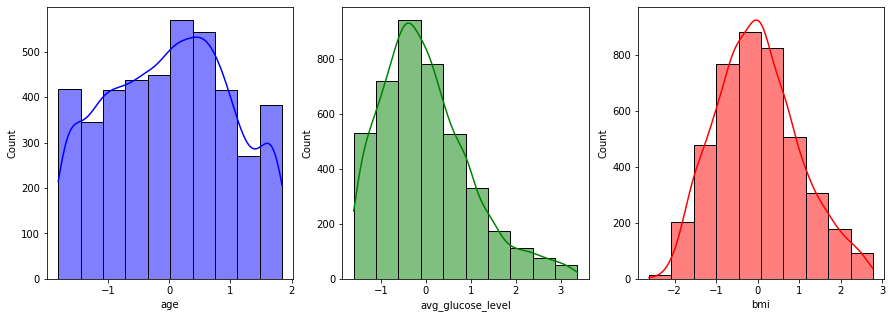

In [ ]:
# Visualizing the numerical data after standardization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=x, x="age", kde=True, bins=10, color="blue", ax=axs[0])
sns.histplot(data=x, x="avg_glucose_level", kde=True, bins=10, color="green", ax=axs[1])
sns.histplot(data=x, x="bmi", kde=True, bins=10, color="red", ax=axs[2])

plt.show()

The distribution preserved the shape after standardization

# 3 - Creating the model

<h2>Splitting the data into training and testing sets</h2>

In [ ]:
# Converting the dataframe to arrays
x_array = x.values
y_array = y.values

In [ ]:
# Importing the library
from sklearn.model_selection import train_test_split

# Spliting data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [ ]:
# Checking the size of the sets
print(f'Training input shape: {X_train.shape}')
print(f'Percentage in relation to original dataset: {round(len(X_train)/len(x_array) * 100, 1)}%\n')

print(f'Testing input shape: {X_test.shape}')
print(f'Percentage in relation to original dataset: {round(len(X_test)/len(x_array) * 100, 1)}%\n')

Training input shape: (3400, 13)
Percentage in relation to original dataset: 80.0%

Testing input shape: (850, 13)
Percentage in relation to original dataset: 20.0%



<h2>Creating the model - ANN</h2>

In [ ]:
# Importing the libraries
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Defining the layers of the ANN
model = Sequential([
    Dense(26, activation='relu', input_shape=(13,)),
    Dense(26, activation='softmax'),
    Dense(26, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
hist = model.fit(X_train, y_train,
          batch_size=200, epochs=20,
          verbose=0)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

<h2>Model evaluation - ANN</h2>

In [ ]:
# Accuracy = TP+TN/TP+FP+FN+TN
print(f'Accuracy - ANN:\t\t{round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%')

# Precision = TP/TP+FP
print(f'Precision - ANN:\t{round(metrics.precision_score(y_test, y_pred)*100, 2)}%')

# Recall = TP/TP+FN
print(f'Recall - ANN:\t\t{round(metrics.recall_score(y_test, y_pred)*100, 2)}%')

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print(f'F1-Score - ANN:\t\t{round(metrics.f1_score(y_test, y_pred)*100, 2)}%')

Accuracy - ANN:		96.71%
Precision - ANN:	0.0%
Recall - ANN:		0.0%
F1-Score - ANN:		0.0%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


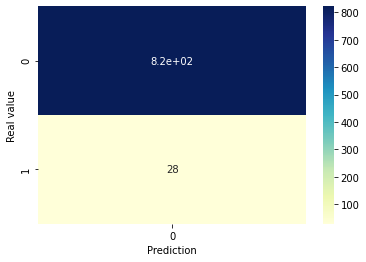

In [ ]:
# Ploting a confusion matrix
confusion_matrix = pd.crosstab(y_test.reshape(y_test.shape[0]), 
                               y_pred.reshape(y_pred.shape[0]), 
                               rownames=['Real value'], 
                               colnames=['Prediction'])

sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu')
plt.show()

The model only predicted 0 values!

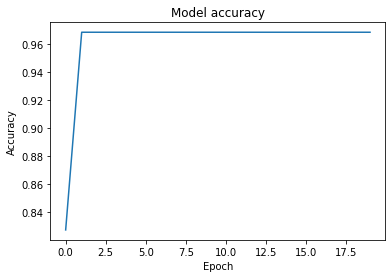

In [ ]:
# Accuracy across the epochs
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

<h2>Creating the model - Decision Tree</h2>

In [ ]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg

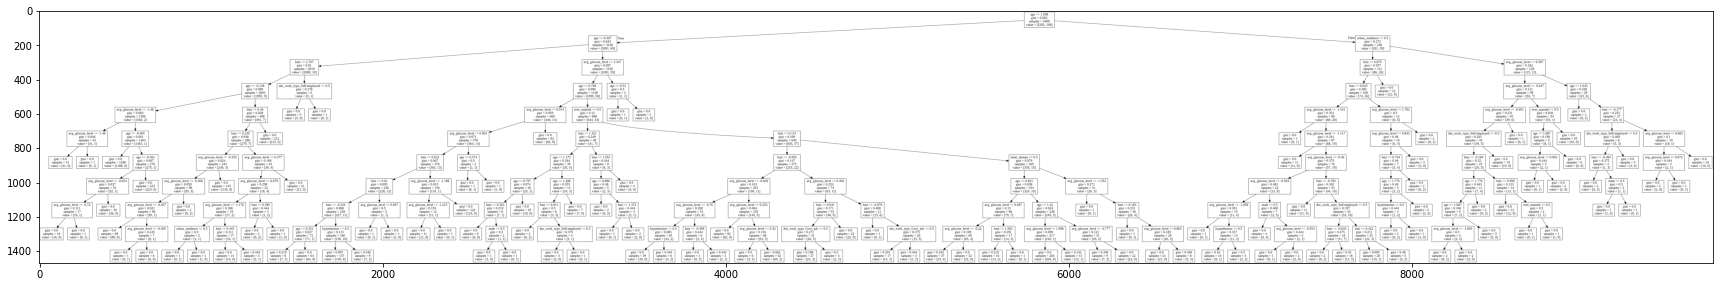

In [ ]:
# Defining the tree
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree = decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_test)

# Generating the visual representation
data = tree.export_graphviz(decision_tree, out_file=None, 
                            feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(data)

graph.write_png('decision_tree.png')
img = pltimg.imread('decision_tree.png')

fig = plt.figure(figsize=(30, 900))

imgplot = plt.imshow(img)
plt.show()

<h2>Evaluating the model - Decision Tree</h2>

In [ ]:
# Accuracy = TP+TN/TP+FP+FN+TN
print(f'Accuracy - Decision Tree:\t{round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%')

# Precision = TP/TP+FP
print(f'Precision - Decision Tree:\t{round(metrics.precision_score(y_test, y_pred)*100, 2)}%')

# Recall = TP/TP+FN
print(f'Recall - Decision Tree:\t\t{round(metrics.recall_score(y_test, y_pred)*100, 2)}%')

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print(f'F1-Score - Decision Tree:\t{round(metrics.f1_score(y_test, y_pred)*100, 2)}%')

Accuracy - Decision Tree:	95.76%
Precision - Decision Tree:	10.0%
Recall - Decision Tree:		3.57%
F1-Score - Decision Tree:	5.26%


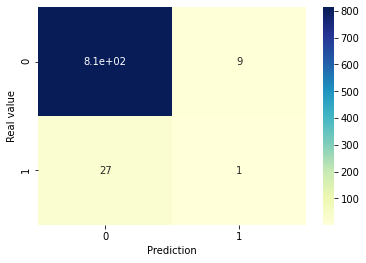

In [ ]:
# Ploting a confusion matrix
confusion_matrix = pd.crosstab(y_test.reshape(y_test.shape[0]), 
                               y_pred, rownames=['Real value'], 
                               colnames=['Prediction'])
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu')
plt.show()

<h2>Creating the model - SVM</h2>

In [ ]:
# Importing the library
from sklearn import svm

# Instantiation of the SVM classifier
svm_classifier = svm.SVC(kernel='sigmoid')
# Possible values for kernel 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 

# Training
svm_classifier.fit(X_train, y_train.reshape(y_train.shape[0]))

# Prediction
y_pred = svm_classifier.predict(X_test)

<h2>Evaluating the model - SVM</h2>

In [ ]:
# Accuracy = TP+TN/TP+FP+FN+TN
print(f'Accuracy - SVM:\t\t{round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%')

# Precision = TP/TP+FP
print(f'Precision - SVM:\t{round(metrics.precision_score(y_test, y_pred)*100, 2)}%')

# Recall = TP/TP+FN
print(f'Recall - SVM:\t\t{round(metrics.recall_score(y_test, y_pred)*100, 2)}%')

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print(f'F1-Score - SVM:\t\t{round(metrics.f1_score(y_test, y_pred)*100, 2)}%')

Accuracy - SVM:		95.76%
Precision - SVM:	30.0%
Recall - SVM:		21.43%
F1-Score - SVM:		25.0%


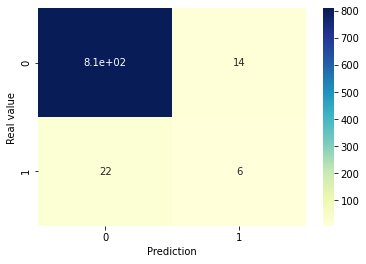

In [ ]:
# Ploting a confusion matrix
confusion_matrix = pd.crosstab(y_test.reshape(y_test.shape[0]), 
                               y_pred, rownames=['Real value'], 
                               colnames=['Prediction'])
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu')
plt.show()